In [413]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

plt.style.use('seaborn')

In [414]:
df = pd.read_csv('cleaned_data/dds11.csv')

In [415]:
# Make Categorical Variables
df['age_range'] = pd.Categorical(df['age_range'], 
                                 categories=['14-19', '20-26', '27-33',
                                             '34-50', '51-69', '70 or older'],
                                 ordered=True)
df['income'] = pd.Categorical(df['income'], 
               categories=['Less than $29,999', '$30,000 to $49,999',
                           '$50,000 to $99,999', '$100,000 to $299,999',
                           'More than $300,000', 'Do not know'], ordered=True)
df['willing_to_pay_no_ads_news'] = pd.Categorical(df['willing_to_pay_no_ads_news'],
                                                  categories=['Agree strongly', 'Agree somewhat',
                                                              'Disagree somewhat', 'Disagree strongly',
                                                              'N/A; I do not have a basis to answer'],
                                                 ordered=True)

### Groups to Categorize:
1. Age Range
2. Gender
3. Region
4. Income
5. Ethnicitiy

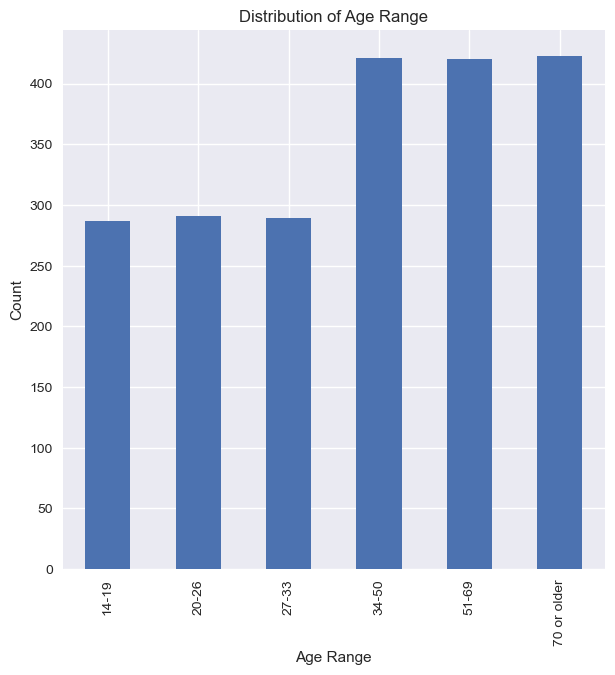

In [416]:
# Plot Distribution of Each of Those Groups

# Age Range
plt.figure(figsize=(7,7))
pd.Categorical(df['age_range'])\
    .value_counts()\
    .plot(kind='bar')
plt.title('Distribution of Age Range')
plt.xlabel('Age Range'); plt.ylabel('Count')
plt.show()

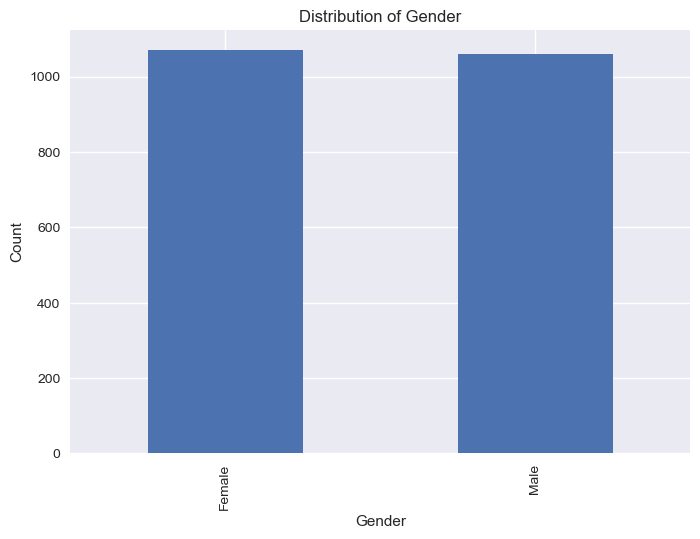

In [417]:
# Distribution of Gender
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender'); plt.ylabel('Count')
plt.show()

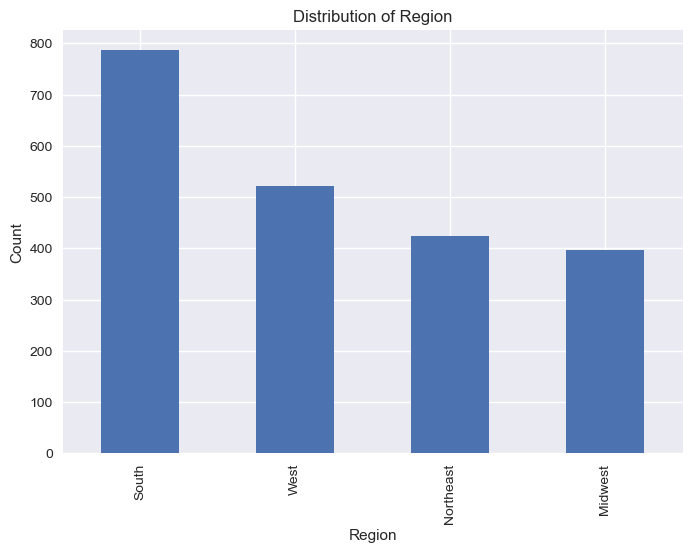

In [418]:
# Distribution of Region
df['region'].value_counts().plot(kind='bar')
plt.title('Distribution of Region')
plt.xlabel('Region'); plt.ylabel('Count')
plt.show()

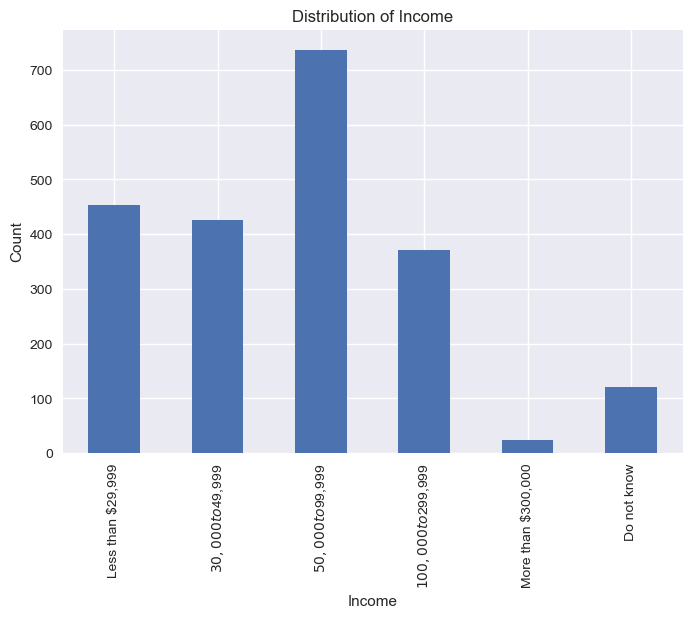

In [419]:
# Distribution of Income
pd.Categorical(df['income'])\
    .value_counts().plot(kind='bar')
plt.title('Distribution of Income')
plt.xlabel('Income'); plt.ylabel('Count')
plt.show()

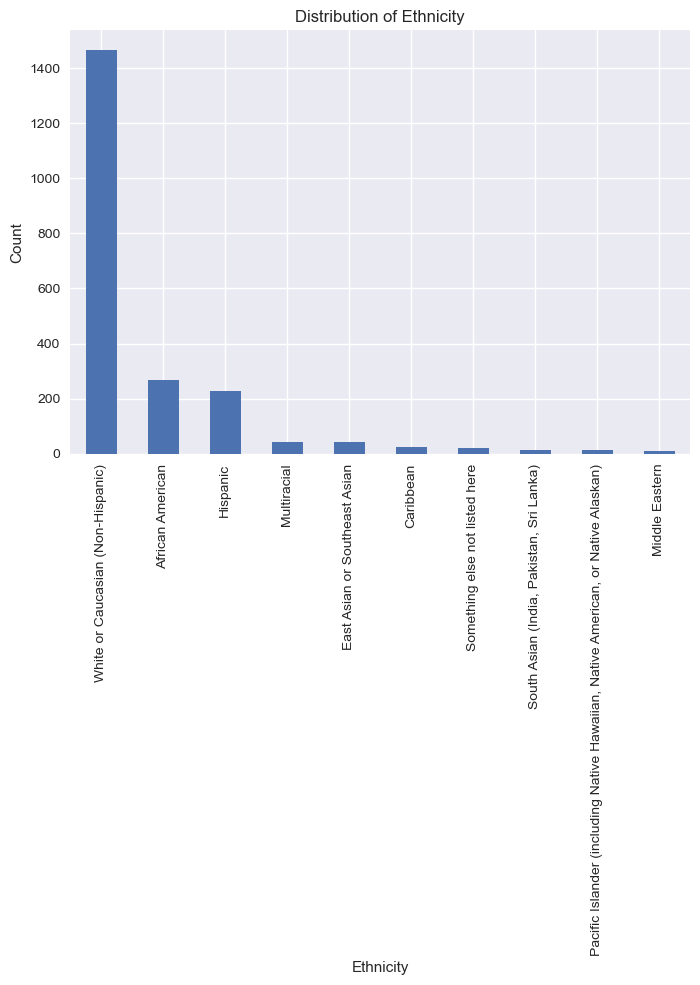

In [420]:
# Distribution of Ethnicity
df['ethnicity'].value_counts().plot(kind='bar')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity'); plt.ylabel('Count')
plt.show()

### Breakdown of Habits By Group

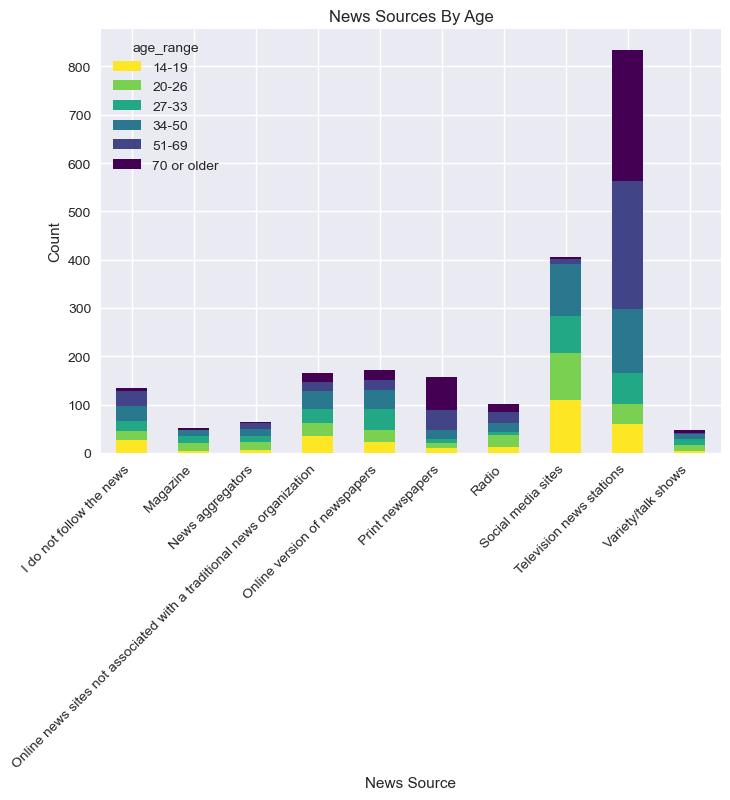

In [421]:
df[['age_range', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='age_range', values=0)\
    .plot(kind='bar', stacked=True, colormap='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Age')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

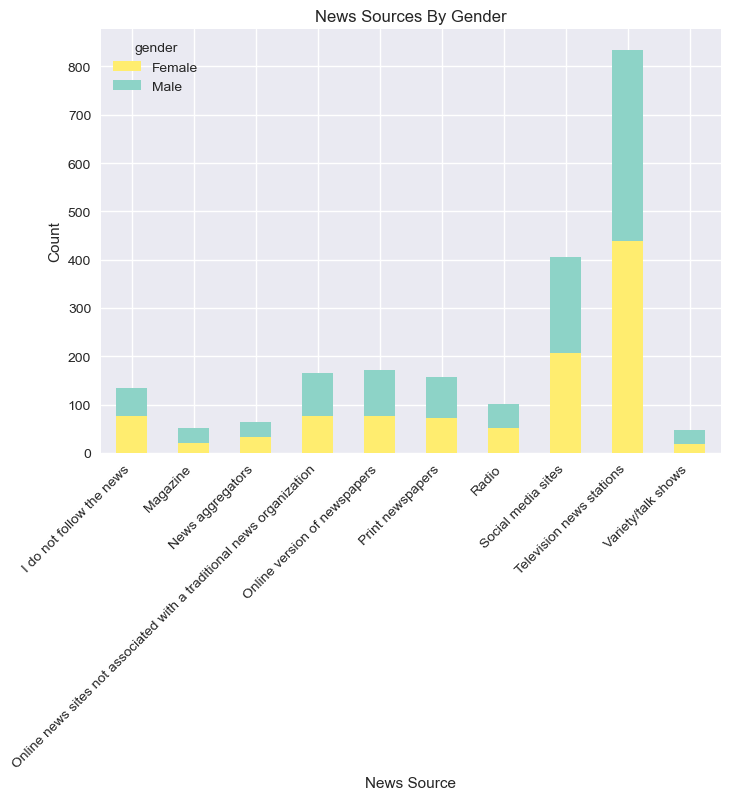

In [422]:
df[['gender', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='gender', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set3_r')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Gender')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

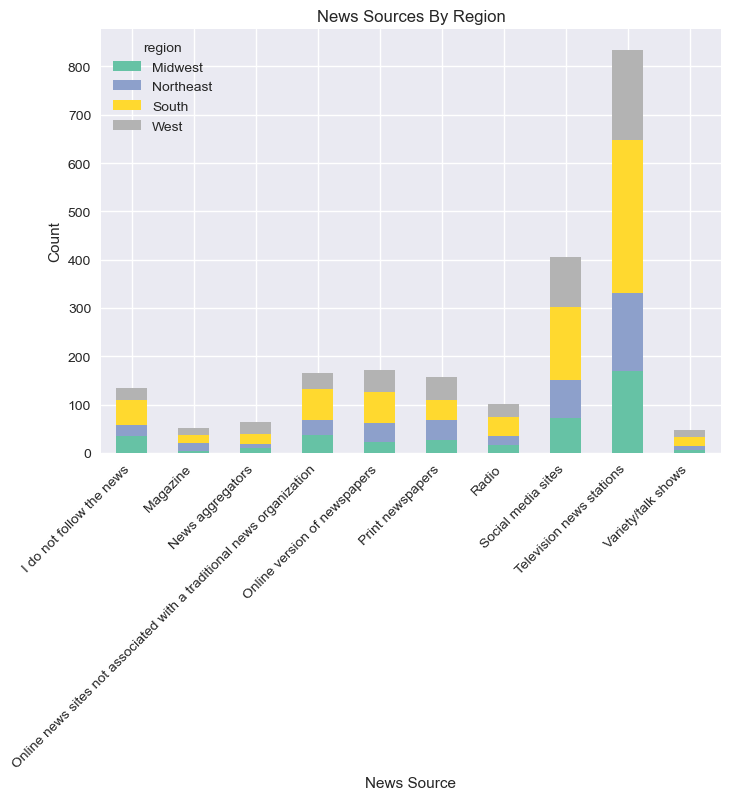

In [423]:
df[['region', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='region', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Region')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

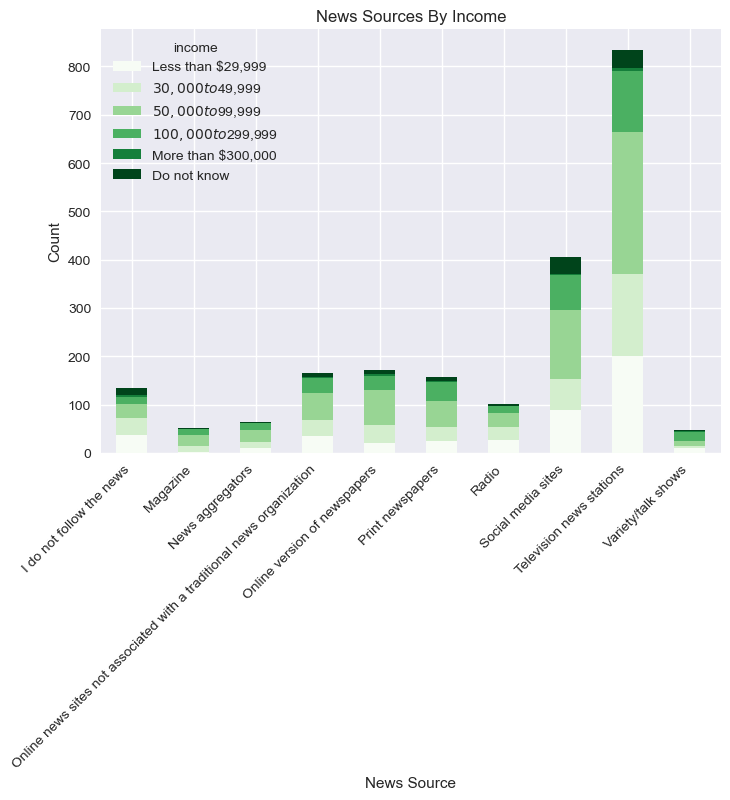

In [424]:
df[['income', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='income', values=0)\
    .plot(kind='bar', stacked=True, colormap='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Income')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'I would rather pay for news online in exchange for not being exposed to advertisements\n')

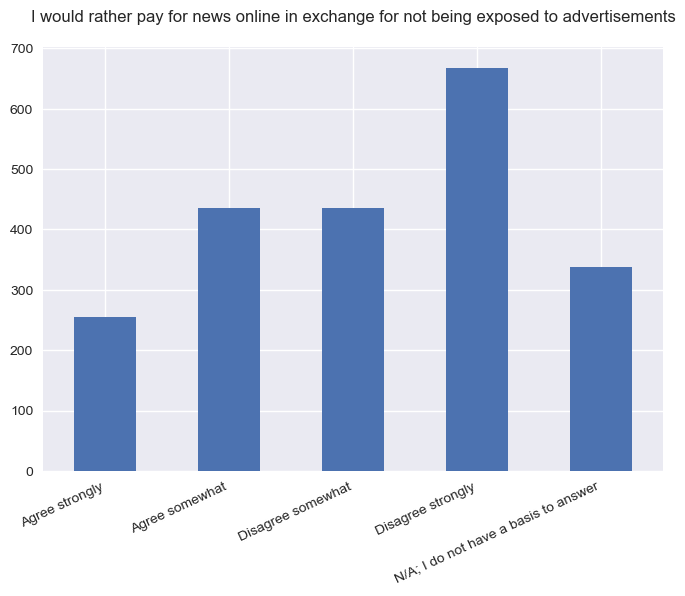

In [425]:
pd.Categorical(df['willing_to_pay_no_ads_news'])\
    .value_counts().plot(kind='bar')
plt.xticks(rotation=25, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')

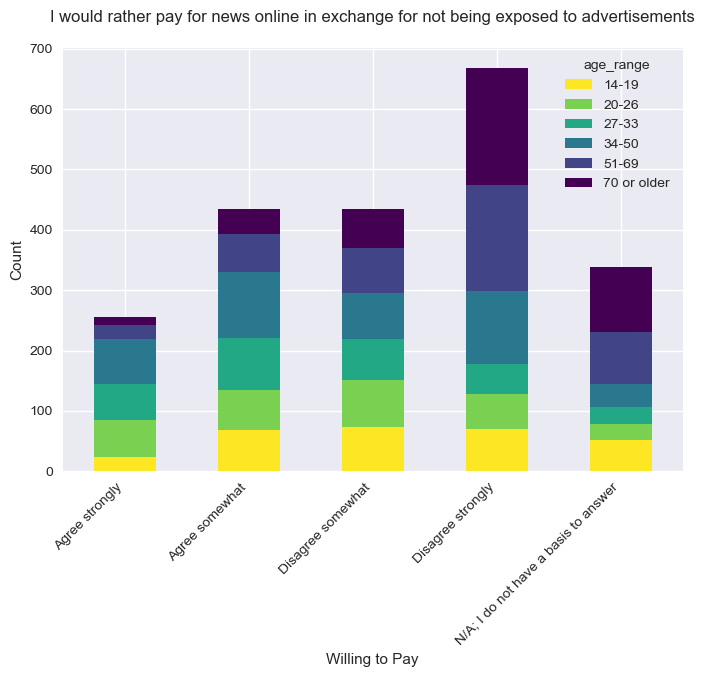

In [426]:
df[['willing_to_pay_no_ads_news', 'age_range']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='age_range', values=0)\
    .plot(kind='bar', stacked=True, colormap='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

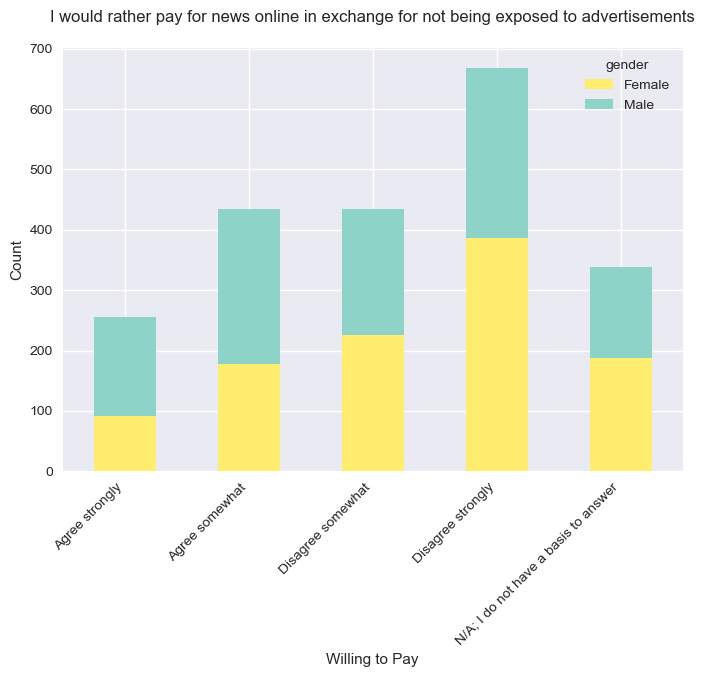

In [427]:
df[['willing_to_pay_no_ads_news', 'gender']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='gender', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set3_r')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

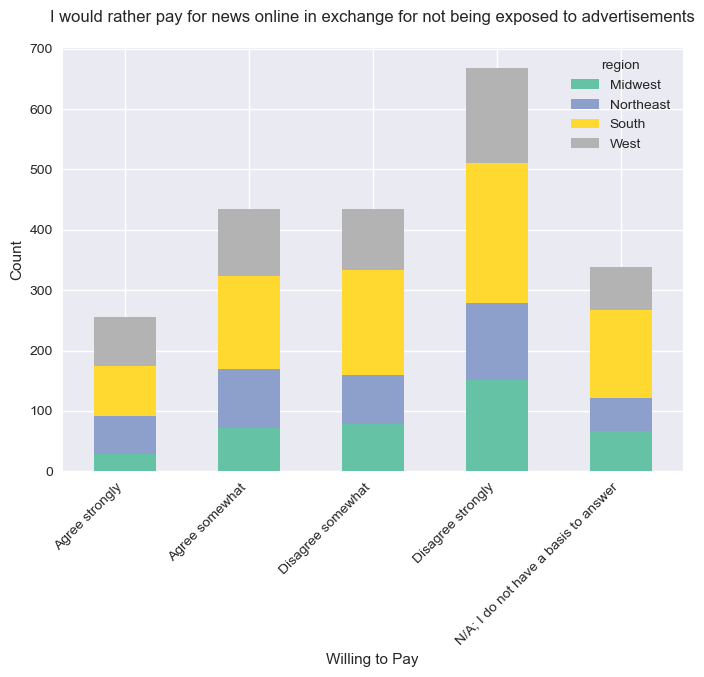

In [428]:
df[['willing_to_pay_no_ads_news', 'region']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='region', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

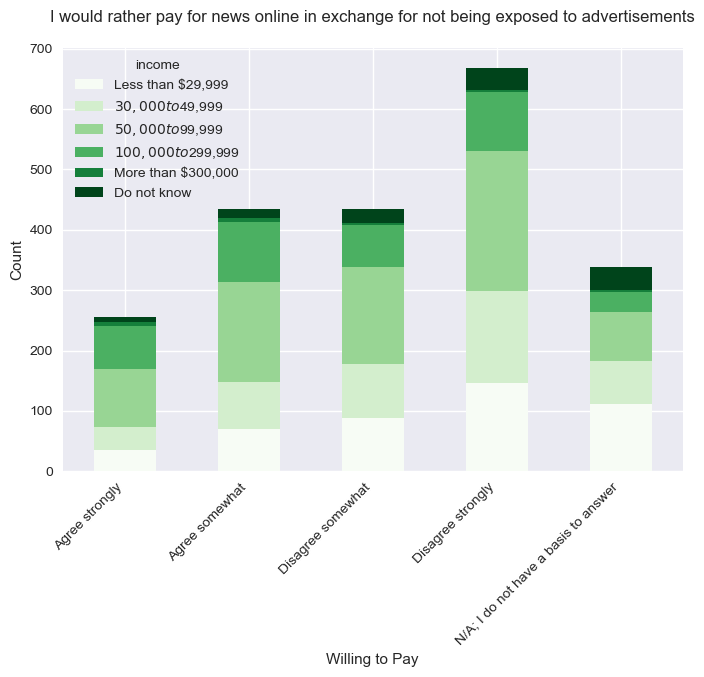

In [429]:
df[['willing_to_pay_no_ads_news', 'income']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='income', values=0)\
    .plot(kind='bar', stacked=True, colormap='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

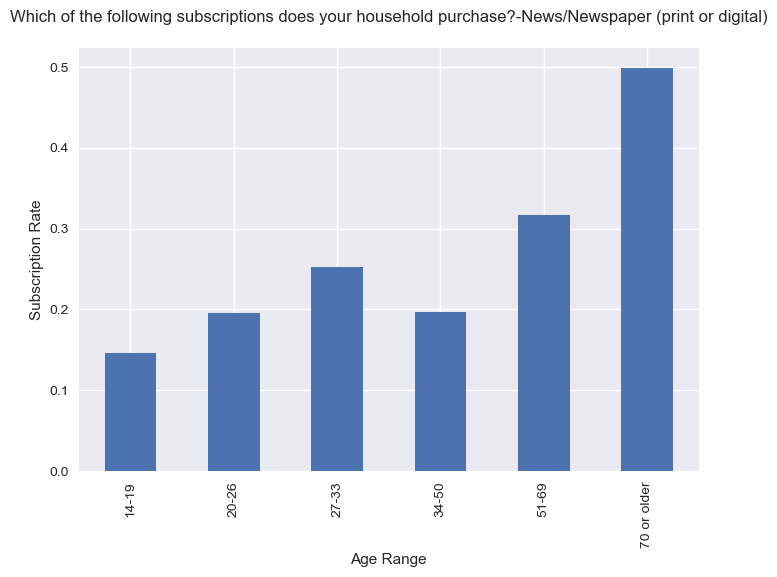

In [430]:
df[['age_range', 'subscriber_newspaper']]\
    .groupby('age_range')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['age_range'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Age Range'); plt.ylabel('Subscription Rate')
plt.show()

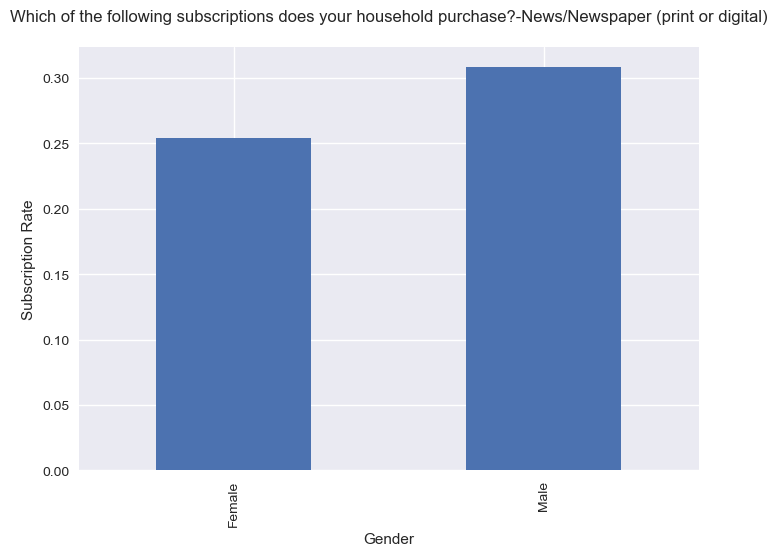

In [431]:
df[['gender', 'subscriber_newspaper']]\
    .groupby('gender')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['gender'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Gender'); plt.ylabel('Subscription Rate')
plt.show()

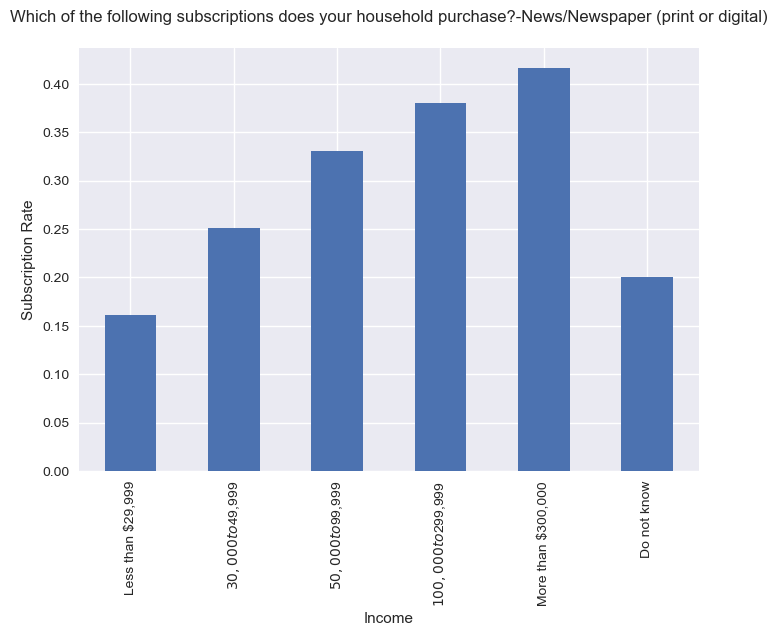

In [432]:
df[['income', 'subscriber_newspaper']]\
    .groupby('income')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['income'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Income'); plt.ylabel('Subscription Rate')
plt.show()

In [433]:
df['rank_entertainment_news']

0       2.0
1       0.0
2       2.0
3       0.0
4       0.0
       ... 
2126    0.0
2127    0.0
2128    0.0
2129    0.0
2130    0.0
Name: rank_entertainment_news, Length: 2131, dtype: float64

## Grouping respondents and finding trends

### Task 1: Who will pay for an app based news subscription and where would I find them to advertise to

In [434]:
# Subset to only those who currently pay for any news or video streaming subscription
df_subscribers = df[(df['subscriber_newspaper'] == 1) | (df['subscriber_newspaper'] == 1)]
print(f"There are {len(df_subscribers)} people in the dataset who pay for any kind of video streaming or news subscription")
df_subscribers.head()

There are 599 people in the dataset who pay for any kind of video streaming or news subscription


,ID,age,gender,age_range,state,region,employment_status,ethnicity,children,children_0-4,...,willing_to_pay_no_ads_sports,willing_to_pay_no_ads_games,willing_to_pay_no_ads_music,willing_to_pay_no_ads_tv,willing_to_pay_no_ads_movies,target_ads,worried_identity_theft,ads_cheaper_subscription,news_source,final_weights
0,4,36,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),1,0,...,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Magazine,0.083025
8,8,74,Male,70 or older,New Jersey,Northeast,Retired,White or Caucasian (Non-Hispanic),0,0,...,N/A; I do not have a basis to answer,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Television news stations,0.082714
15,23,15,Male,14-19,Kentucky,South,Student,White or Caucasian (Non-Hispanic),1,0,...,Agree somewhat,Agree somewhat,Agree somewhat,Agree somewhat,N/A; I do not have a basis to answer,Disagree somewhat,Agree somewhat,Agree somewhat,Social media sites,0.741944
18,38,67,Male,51-69,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),0,0,...,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,Television news stations,0.313181
21,39,21,Female,20-26,Texas,South,Employed full-time or part-time,African American,1,0,...,Disagree somewhat,Disagree somewhat,Disagree somewhat,Agree strongly,Agree somewhat,Agree strongly,Agree somewhat,Agree strongly,Magazine,3.018257


[0 0 0 ... 1 1 1]
[2 0 2 ... 1 1 1]
[3 0 3 ... 2 2 2]
[2 0 2 ... 1 1 1]
[3 4 3 ... 2 5 2]


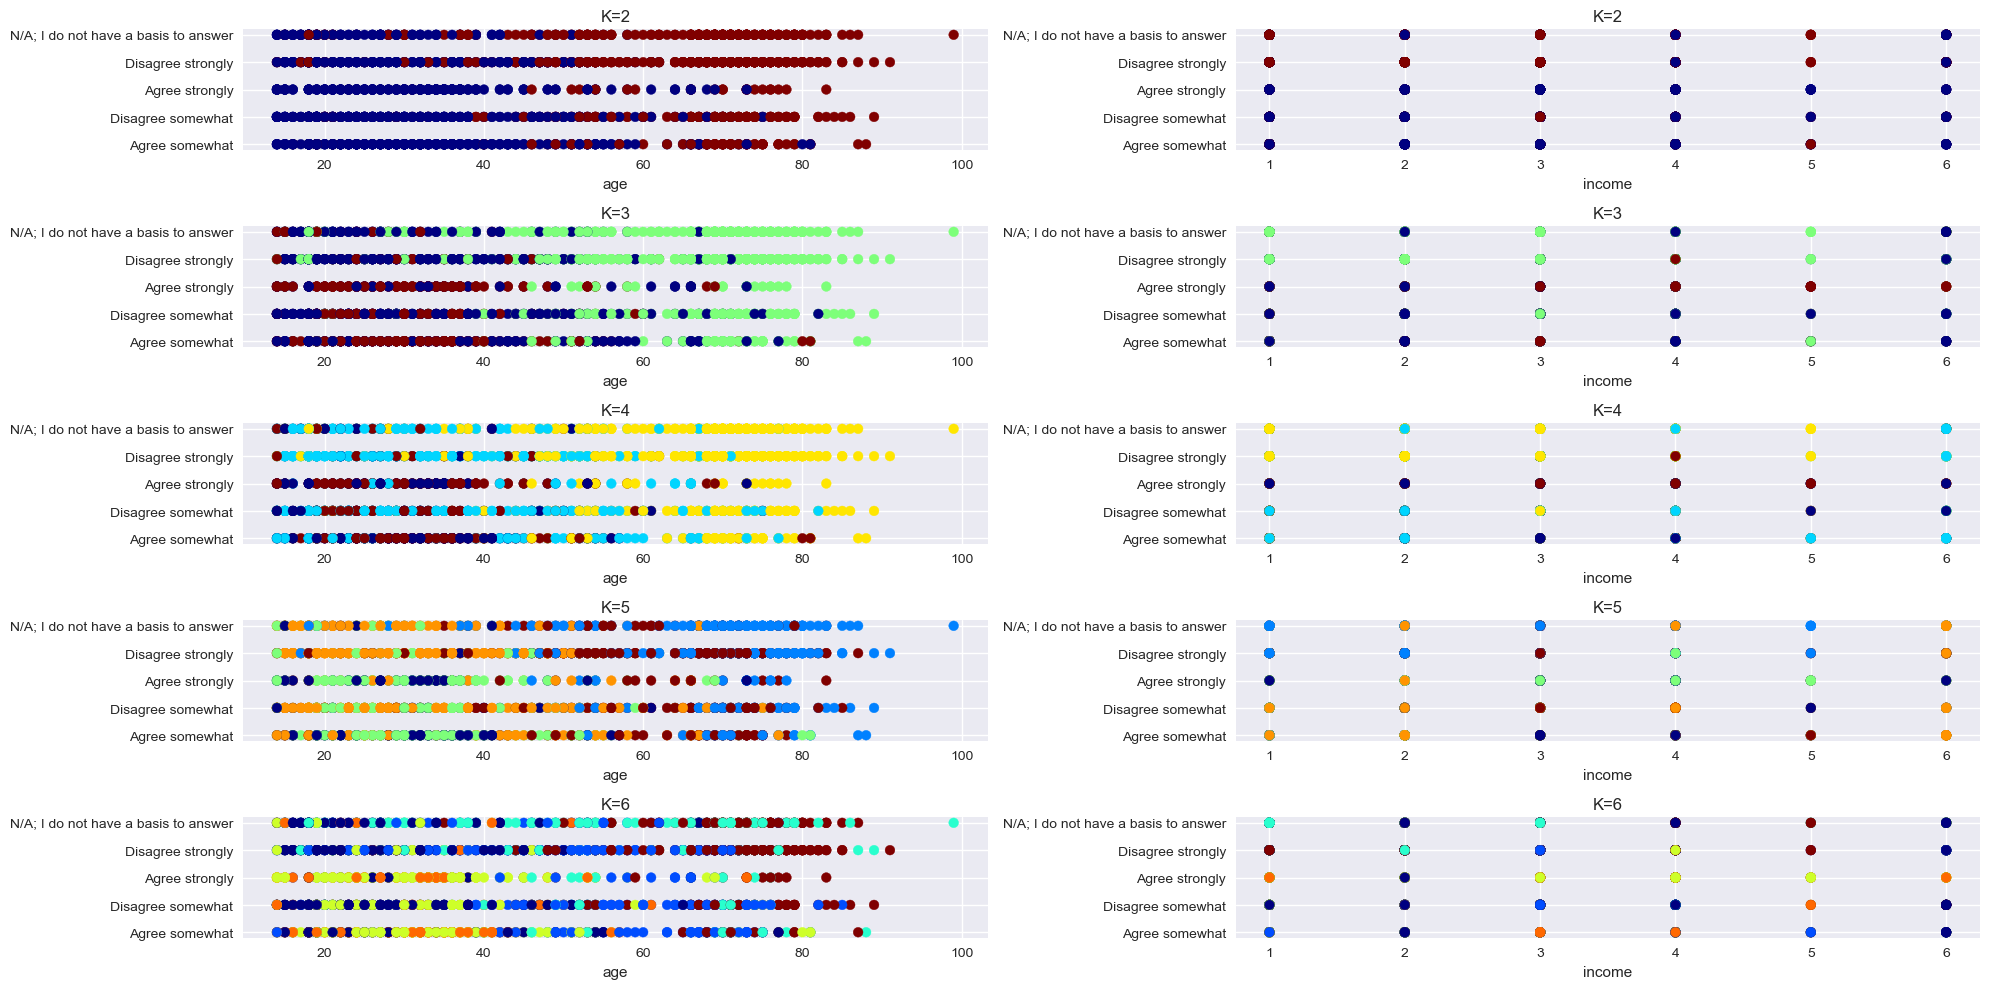

[0 0 0 ... 1 1 1]
[2 0 2 ... 1 1 1]
[3 0 3 ... 2 2 2]
[2 0 2 ... 1 1 1]
[3 4 3 ... 2 5 2]


<Figure size 800x550 with 0 Axes>

[0 0 0 ... 1 1 1]
[2 0 2 ... 1 1 1]
[3 0 3 ... 2 2 2]
[2 0 2 ... 1 1 1]
[3 4 3 ... 2 5 2]


<Figure size 800x550 with 0 Axes>

[0 0 0 ... 1 1 1]
[2 0 2 ... 1 1 1]
[3 0 3 ... 2 2 2]
[2 0 2 ... 1 1 1]
[3 4 3 ... 2 5 2]


<Figure size 800x550 with 0 Axes>

[0 0 0 ... 1 1 1]
[2 0 2 ... 1 1 1]
[3 0 3 ... 2 2 2]
[2 0 2 ... 1 1 1]
[3 4 3 ... 2 5 2]


<Figure size 800x550 with 0 Axes>

In [435]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Convert categorical demographic variables to numerical features
income_map = {
    'Less than $29,999': 1,
    '$30,000 to $49,999': 2,
    '$50,000 to $99,999': 3,
    '$100,000 to $299,999': 4,
    'More than $300,000': 5,
    'Do not know': 6
}
df['income'] = df['income'].map(income_map)

gender_map = {
    'Male': 1,
    'Female': 2,
}
df['gender'] = df['gender'].map(gender_map)

# Separate demographic variables from feature variables
# demographic_vars = ['age', 'income', 'gender']
demographic_vars = ['age', 'income']

feature_vars = [col for col in df.columns if col not in demographic_vars and col != 'willing_to_pay_no_ads_news']

# One-hot encode categorical feature variables
encoder = OneHotEncoder()
X = encoder.fit_transform(df[feature_vars])

# Perform k-means clustering
k_values = [2, 3, 4, 5, 6]
outcome_var = 'willing_to_pay_no_ads_news'
outcome_values = list(np.unique(df.willing_to_pay_no_ads_news))

cluster_assignments = {}


# create a figure with subplots
fig, axs = plt.subplots(len(k_values), len(demographic_vars), figsize=(20, 10))


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_assignments[k] = kmeans.labels_

    x_cols = demographic_vars
    y_col = 'willing_to_pay_no_ads_news'


    # loop over k values and x-axis variables
    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        print(labels)
        # Define a colormap to generate a list of colors for each cluster label
        colors = plt.cm.tab20(np.linspace(0, 1, k))

        
        for j, col in enumerate(x_cols):
            axs[i,j].scatter(df[col], df[y_col], c=labels, cmap='jet')
            axs[i,j].set_xlabel(col)
            # axs[i,j].set_ylabel(y_col)
            axs[i,j].set_title(f'K={k}')

    plt.tight_layout()
    plt.show()




# NEED TO MODIFY
# Rethink what vars to cluster on (should include demographics probably, maybe one with just spending behaviors)
# Need to one hot encode/map in such a way that text which indicate higher spending inclination should have similar higher numbers associated
# Make 3 plots:
    # age vs income, c = label
    # income vs gener
    # age vs gender
# Now see if there are clusters forming

# can also run a classification model, which uses all feature to classify/predict willing_to_pay_no_ads and see what variables are important and if those can be used for market segmentation

# These 2 analyses (supervised and unsupervised) with tons of EDA should suffice for report.







Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 68, cost: 2911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 90, cost: 2861.0
Run 2, iteration: 2/100, moves: 1, cost: 2861.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 104, cost: 3111.0
Run 3, iteration: 2/100, moves: 66, cost: 2999.0
Run 3, iteration: 3/100, moves: 107, cost: 2927.0
Run 3, iteration: 4/100, moves: 77, cost: 2880.0
Run 3, iteration: 5/100, moves: 37, cost: 2859.0
Run 3, iteration: 6/100, moves: 7, cost: 2859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 94, cost: 3145.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 114, cost: 3002.0
Run 5, iteration: 2/100, moves: 116, cost: 2884.0
Run 5, ite

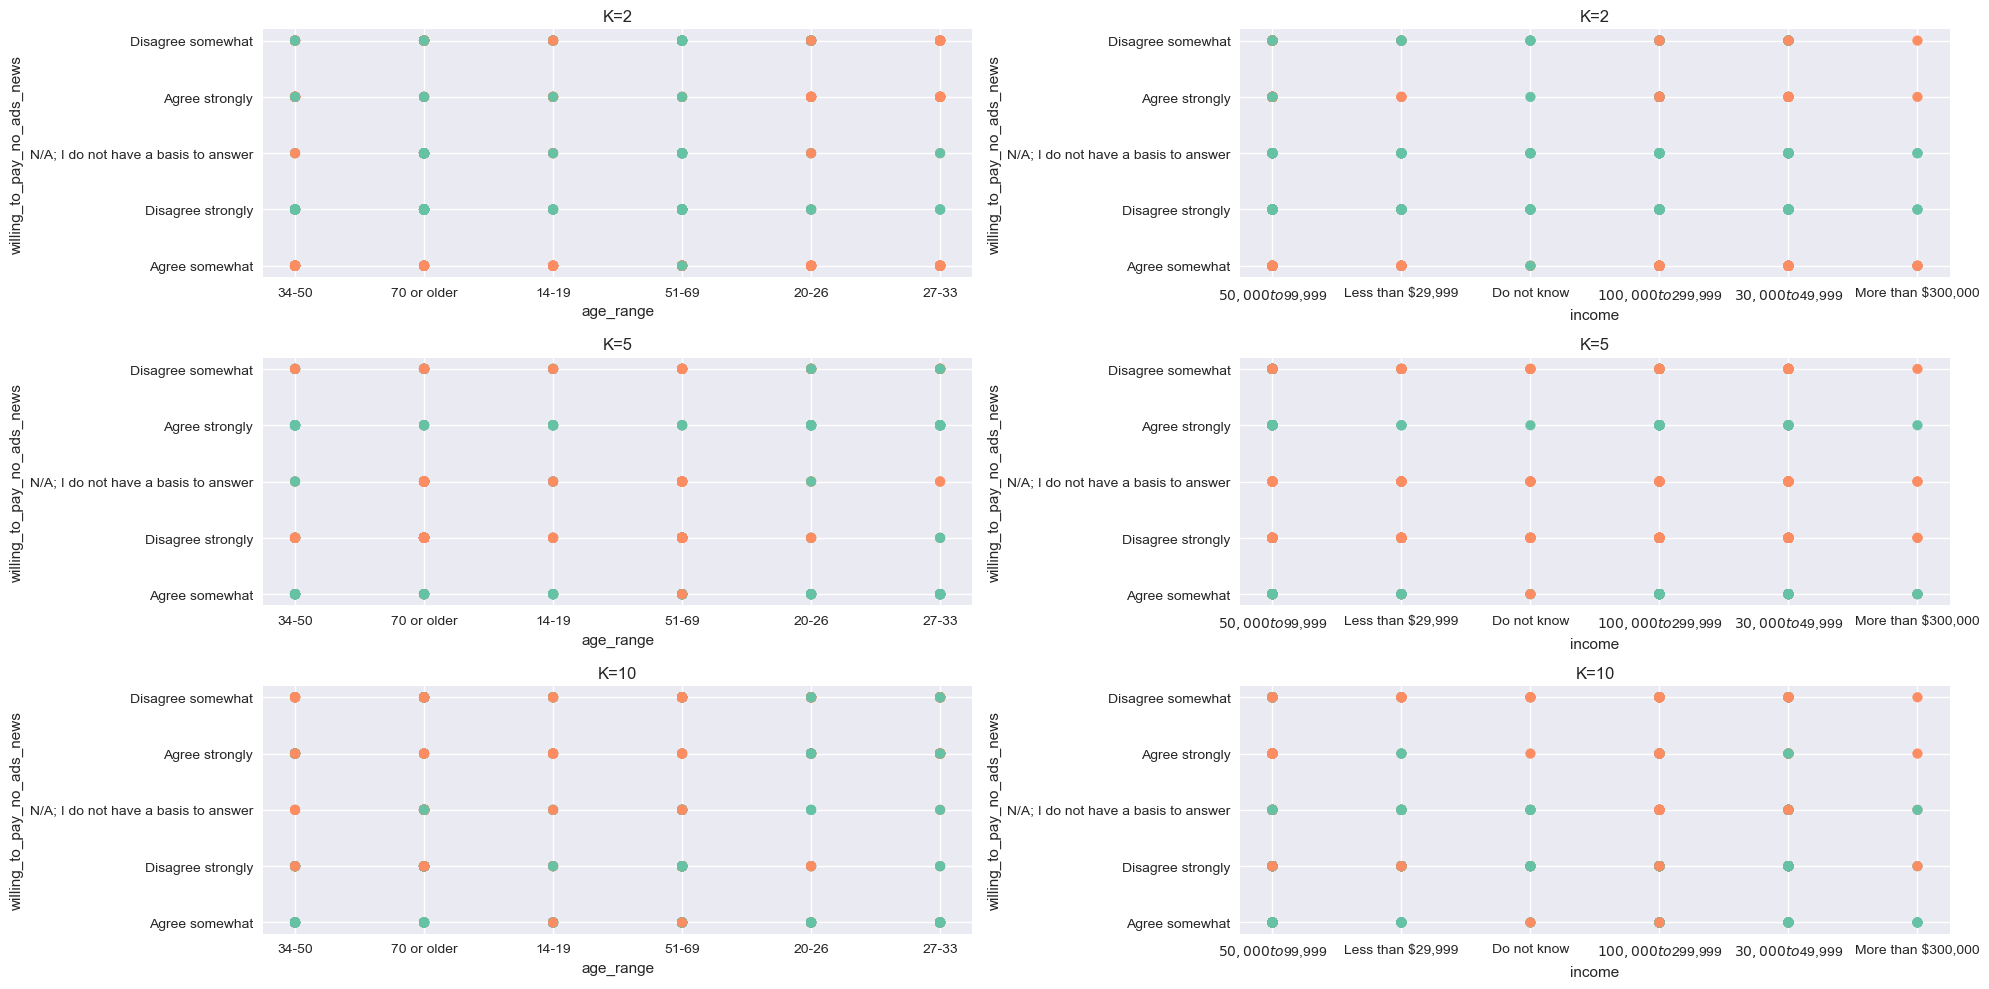

In [80]:
# TO DO: Figure out how to make separate colors for K > 2 clusters
# Basic idea is that can we cluster to find out people who are not opposed to pay for ad free subscription
# And if we can, who are those people (in terms of age and gender)
# And once we know that, we can know from the previous data exploration where to advertise for them
 

from kmodes.kmodes import KModes
from matplotlib.colors import ListedColormap

# Use demographics and willingness to pay variables to group them into clusters
vars_to_cluster_on = [col for col in df_subscribers.columns if 'willing_to_pay' in col] + ['age', 'gender', 'children']

# Visualize
k_values = [2,5,10]
# x_cols = ['age', 'income', 'pct_watch_tv_television', 'app_type_social', 'app_type_news_consolidator','app_type_newspaper']
x_cols = ['age_range', 'income']

y_col = 'willing_to_pay_no_ads_news'

# Define a list of custom colormaps
colors = [(0.4, 0.7607843137254902, 0.6470588235294118),
          (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]
cmaps = [ListedColormap(colors) for _ in k_values]

# create a figure with subplots
fig, axs = plt.subplots(len(k_values), len(x_cols), figsize=(20, 10))

# loop over k values and x-axis variables
for i, k in enumerate(k_values):
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1).fit(df_subscribers[vars_to_cluster_on])
    labels = km.labels_
    
    for j, col in enumerate(x_cols):
        axs[i,j].scatter(df_subscribers[col], df_subscribers[y_col], c=labels, cmap=cmaps[i])
        axs[i,j].set_xlabel(col)
        axs[i,j].set_ylabel(y_col)
        axs[i,j].set_title(f'K={k}')

plt.tight_layout()
plt.show()
